In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)

# To construct the data, seven geometric parameters of wheat kernels were measured:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3)
df.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
# train_test splitting the data to 80/20 train/test 
seeds_train, seeds_test = train_test_split(df, test_size=0.20, random_state=275, shuffle=True)

df_raw = seeds_train

df_raw.describe()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,14.893038,14.578924,0.871801,5.635443,3.264778,3.668158,5.407513,1.968354
std,2.851388,1.285563,0.023034,0.442427,0.368206,1.418280,0.498740,0.817179
min,10.740000,12.570000,0.808100,4.902000,2.630000,0.903000,4.519000,1.000000
25%,12.315000,13.470000,0.857600,5.263250,2.954750,2.690750,5.044500,1.000000
50%,14.380000,14.320000,0.874800,5.530500,3.237000,3.559500,5.220500,2.000000
75%,17.562500,15.857500,0.887075,5.999500,3.571250,4.694000,5.879000,3.000000
max,20.880000,17.230000,0.918300,6.675000,4.032000,8.315000,6.550000,3.000000


### Preprocessing for Seed Training Dataset

In [4]:
df_preprocessed = df_raw

# Remove outliers
Q1 = df_preprocessed.quantile(0.25)
Q3 = df_preprocessed.quantile(0.75)
IQR = Q3 - Q1

print('Before outlier removal: ', df_preprocessed.shape)
df_preprocessed = df_preprocessed[~((df_preprocessed < (Q1 - 1.5 * IQR)) |(df_preprocessed > (Q3 + 1.5 * IQR))).any(axis=1)]
print('After outlier removal: ', df_preprocessed.shape)

# Check for any Nan
print( "Num of NaN: ", df_preprocessed[df_preprocessed.isna().any(1)])

# Normalize the features
col_to_norm = ['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove']
scaler = MinMaxScaler()
scaler.fit(df_preprocessed[col_to_norm])
df_preprocessed[col_to_norm] = scaler.transform(df_preprocessed[col_to_norm])

df_seeds_train_preprocessed = df_preprocessed
df_seeds_train_raw = df_raw
df_preprocessed


Before outlier removal:  (158, 8)
After outlier removal:  (155, 8)
Num of NaN:  Empty DataFrame
Columns: [area, perimeter, compactness, length_kernel, width_kernel, asymmetry_coeff, length_of_kernel_groove, target]
Index: []


<ipython-input-4-b88724816933>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed[col_to_norm] = scaler.transform(df_preprocessed[col_to_norm])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
95,0.559172,0.575107,0.687992,0.460237,0.638374,0.500529,0.541113,2
94,0.786982,0.809013,0.632874,0.742809,0.751783,0.194079,0.776957,2
35,0.400394,0.418455,0.645669,0.425268,0.469330,0.333635,0.388971,1
80,0.742604,0.755365,0.691929,0.716864,0.728245,0.232593,0.826194,2
61,0.211045,0.199571,0.700787,0.133672,0.348787,0.218849,0.043328,1
...,...,...,...,...,...,...,...,...
96,0.714990,0.706009,0.812008,0.557248,0.758916,0.175955,0.648941,2
57,0.048323,0.012876,0.662402,0.000000,0.177603,0.206313,0.090596,1
46,0.406312,0.450644,0.500984,0.437676,0.447932,0.185168,0.409650,1
58,0.159763,0.133047,0.744094,0.098139,0.293866,0.349947,0.042344,1


### Gaussian Naive Bayes without preprocessing Seed Training Dataset

var_smoothing: 1e-10 	Accuracy: 91.13%
var_smoothing: 1e-09 	Accuracy: 91.13%
var_smoothing: 1e-05 	Accuracy: 91.13%
var_smoothing: 0.001 	Accuracy: 91.79%
var_smoothing: 0.1 	Accuracy: 91.75%


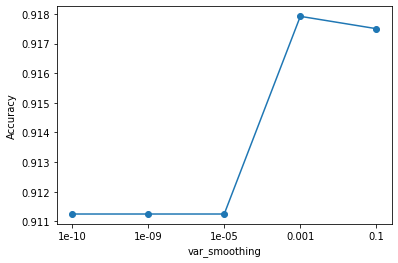

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

df = df_seeds_train_raw

kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []

for v_smooth in var_smoothing:
    model = GaussianNB(var_smoothing=v_smooth)
    results_kfold = cross_val_score(model, x1, y1, cv=kfold)
    print("var_smoothing:", v_smooth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean())  

plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])

plt.show()

### Gaussian Naive Bayes with preprocessed Seed Training Dataset

var_smoothing: 1e-10 	Accuracy: 91.00%
var_smoothing: 1e-09 	Accuracy: 91.00%
var_smoothing: 1e-05 	Accuracy: 91.00%
var_smoothing: 0.001 	Accuracy: 91.00%
var_smoothing: 0.1 	Accuracy: 92.92%


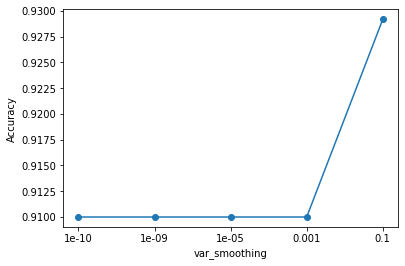

In [7]:
df = df_seeds_train_preprocessed

kfold = KFold(n_splits = 10, shuffle = True, random_state=275)
x1 = df.drop('target', axis=1).values 
y1 = df['target'].values

var_smoothing = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc = []

for v_smooth in var_smoothing:
    model = GaussianNB(var_smoothing=v_smooth)
    results_kfold = cross_val_score(model, x1, y1, cv=kfold)
    print("var_smoothing:", v_smooth, "\tAccuracy: %.2f%%" % (results_kfold.mean()*100.0))
    acc.append(results_kfold.mean())  

plt.plot(range(len(var_smoothing)),acc, '-o')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

plt.xticks(ticks=range(len(var_smoothing)),labels=[str(i) for i in var_smoothing])

plt.show()

We can see that the highest accuracy is when the var_smoothing parameter is set to 0.1 for the preprocessed data. So we'll put this through the test set. We see a substantial impact when increasing var_smoothing parameter. In both the preprocessed and not preprocessed datasets we see that the accuracy peaks when the var_smoothing is set high. When the var_smoothing parameter is tuned, it modifies the amount of variance acceptance for each feature and looks at values that that are further away from the distribution mean.